# Logistic Regression

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import scipy
from scipy import ndimage
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [76]:
#%matplotlib

# Overview dataset

## Create shortcut for path


In [77]:
import os
cwd = os.getcwd() # current working directory
path = os.path.join(cwd, 'data') 
print (path)

/home/user/data_camp_2021_home_works/HW 7 /data


Load dataset


In [78]:
def load_dataset():
    file_name = os.path.join(path , 'train_catvnoncat.h5')
    train_dataset = h5py.File(file_name, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels
    
    file_name=  os.path.join(path , 'test_catvnoncat.h5')
    test_dataset = h5py.File(file_name, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = ['non-cat','cat']
    
    Y_train = Y_train.reshape(-1,1)
    Y_test = Y_test.reshape(-1,1)
    
    return X_train, Y_train, X_test, Y_test, classes

In [79]:
X_train, Y_train, X_test, Y_test, classes = load_dataset()

In [80]:
print('X_train.shape =', X_train.shape)
print('X_test.shape =', X_test.shape)
print('Y_train.shape =', Y_train.shape)
print('Y_test.shape =', Y_test.shape)

X_train.shape = (209, 64, 64, 3)
X_test.shape = (50, 64, 64, 3)
Y_train.shape = (209, 1)
Y_test.shape = (50, 1)


In [81]:
m_train = len(Y_train)
num_px = len(X_train[0])
m_test = len(Y_test)

In [82]:
print("Number of training examples: m_train = " + str(m_train))
print("Number of testing examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px = " + str(num_px))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)


# Review some examples

In [83]:
index = 11
plt.imshow(X_train[index])
print ("y = " + str(Y_train[index,:]) + ", it's a '" + classes[np.squeeze(Y_train[index,:])] +  "' picture.")

y = [1], it's a 'cat' picture.


In [84]:
index = 3
plt.imshow(X_train[index])
print ("y = " + str(Y_train[index,:]) + ", it's a '" + classes[np.squeeze(Y_train[index,:])] +  "' picture.")

y = [0], it's a 'non-cat' picture.


In [85]:
print('Label 1 count:', np.sum(Y_train!=0))
print('Label 0 count:', np.sum(Y_train==0))

Label 1 count: 72
Label 0 count: 137


# Flatten features

In [86]:
# YOUR_CODE. Reshape the training and test set to shape (number_of_samples,  num_px*num_px*3)
X_train_flatten = X_train.reshape(209, 12288)
X_test_flatten = X_test.reshape(50, 12288)

Check result

In [87]:
print(f'train_set_x_flatten shape: {X_train_flatten.shape}')
print(f'test_set_x_flatten shape: {X_test_flatten.shape}')
print(f'sanity check after reshaping: {X_train_flatten[0, :5]}')

train_set_x_flatten shape: (209, 12288)
test_set_x_flatten shape: (50, 12288)
sanity check after reshaping: [17 31 56 22 33]


# Normalize features

In [88]:
X_train_scaled = X_train_flatten / 255.
X_test_scaled = X_test_flatten / 255.

sigmoid function

In [89]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    g -- sigmoid(z)
    """

    g = 1 / (1 + np.exp(-z))
    
    return g

Check result

In [90]:
print("sigmoid([0, 2]) " + str(sigmoid(np.array([0, 2]))))

sigmoid([0, 2]) [0.5        0.88079708]


# Initialize parameters

In [91]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (1, dim) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (1, dim)
    b -- initialized scalar (corresponds to the bias)
    """
    
    # YOUR_CODE.  Initialize b to zero and w as a vector of zeros. 
    # START_CODE  
    w = np.zeros((1, dim))
    b = 0
    # END_CODE 

    assert(w.shape == (1, dim))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

Check result

In [92]:
dim = 2
w, b = initialize_with_zeros(dim)
print("w = " + str(w))
print("b = " + str(b))

w = [[0. 0.]]
b = 0


# Forward and Backward propagation

In [93]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y, C=1):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (1,num_px * num_px * 3)
    b -- bias, a scalar
    X -- data of size (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (number of examples,1)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """
    m = X.shape[0]

    # YOUR_CODE.  implement forward propagation 
    # START_CODE 
    Z = b + X @ w.T
    A = sigmoid(Z)   
    cost = -(1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
  
    # YOUR_CODE.  Implement Backward propahation 
    # START_CODE
    dJ_dw = 1 / m * (A - Y).T @ X
    dJ_db = (1 / m * (A - Y)).sum()
    # END_CODE 

    assert(dJ_dw.shape == w.shape)
    assert(dJ_db.dtype == float)
    assert(cost.dtype == float)
    
    grads = {
        "dJ_dw": dJ_dw,
        "dJ_db": dJ_db
    }
    
    return grads, cost

Check result

In [94]:
w, b, X, Y = np.array([[1., 2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]).T, np.array([[1,0,1]]).T
grads, cost = propagate(w, b, X, Y)
print("dJ_dw = " + str(grads["dJ_dw"]))
print("dJ_db = " + str(grads["dJ_db"]))
print("cost = " + str(cost))

dJ_dw = [[0.99845601 2.39507239]]
dJ_db = 0.001455578136784208
cost = 5.801545319394553


# Optimization

In [95]:
def optimize(w, b, X, Y, num_iterations, learning_rate, C=1, verbose=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (1, num_px * num_px * 3)
    b -- bias, a scalar
    X -- data of size (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (number of examples,1)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
   
    costs = [] # keep history for plotting if necessary 
    
    for i in range(num_iterations):
        # YOUR_CODE.  Call to compute cost and gradient 
        # START_CODE
        grads, cost = propagate(w, b, X, Y)
        # END_CODE 
        
        # Retrieve derivatives from grads
        dJ_dw = grads["dJ_dw"]
        dJ_db = grads["dJ_db"]
        
        # YOUR_CODE.  Update paramaters 
        # START_CODE 
        b = b - learning_rate * dJ_db
        w = w - learning_rate * dJ_dw
        # END_CODE 
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if verbose and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dJ_dw": dJ_dw,
             "dJ_db": dJ_db}
    
    return params, grads, costs

Check result

In [96]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, verbose = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dJ_dw"]))
print ("db = " + str(grads["dJ_db"]))

w = [[0.19033591 0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042 1.41625495]]
db = 0.21919450454067652


# Predict

In [97]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w - weights, a numpy array of size (1,num_px * num_px * 3)
    b - bias, a scalar
    X - data of size (number of examples, num_px * num_px * 3)
    
    Returns:
    Y_prediction - a numpy array of shape (number of examples, 1) containing all predictions (0/1) for the examples in X
    '''
    m, n = X.shape
    assert (w.shape==(1, n))
 
    # YOUR_CODE.  Compute "A" predicting the probabilities of a cat being present in the picture
    # START_CODE
    Z = b + X @ w.T 
    A = sigmoid(Z)
    # END_CODE 

    # YOUR_CODE.  Convert probabilities to actual predictions 0 or 1 
    # START_CODE 
    Y_prediction = np.where(A > 0.5, 1, 0)
    # END_CODE 
    
    assert(Y_prediction.shape == (m, 1))
    
    return Y_prediction

In [98]:
w = np.array([[0.1124579],[0.23106775]]).T
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]]).T
print (f'predictions = \n{predict(w, b, X)}')

predictions = 
[[1]
 [1]
 [0]]


# Model

In [99]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, verbose=False, C=1):
    """
    Builds the logistic regression model by calling the functions implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (number of examples, num_px * num_px * 3)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (number of examples,1)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    C- regularization parameter 

    Returns:
    res -- dictionary containing information about the model.
    """
    
    # YOUR_CODE.
    # START_CODE   

    #  initialize parameters
    dim = X_train_scaled.shape[1]
    w, b = initialize_with_zeros(dim)
    
    # run gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, C, verbose)
    
    # retrieve parameters w and b from dictionary "parameters"
    w = parameters['w']
    b = parameters['b']
    
    # predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    # END_CODE 

    # Print train/test Errors
    print("train accuracy= {:.3%}".format(np.mean(Y_prediction_train == Y_train)))
    print("test accuracy= {:.3%}".format(np.mean(Y_prediction_test == Y_test)))

    res = {'costs': costs,
           'Y_prediction_test': Y_prediction_test, 
           'Y_prediction_train': Y_prediction_train, 
           'w': w, 
           'b': b,
           'learning_rate': learning_rate,
           'num_iterations': num_iterations,
           'C': C
          }
    
    return res

Check result

In [100]:
res = model(
    X_train=X_train_scaled,
    Y_train=Y_train,
    X_test=X_test_scaled,
    Y_test=Y_test,
    num_iterations=3000,
    learning_rate=0.005,
    verbose=True,
    C=0.3 # 0.6 is still overfitting,   0.3  is low value to keep the test accuracy ashigh as possible
)


Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
Cost after iteration 2000: 0.135608
Cost after iteration 2100: 0.130708
Cost after iteration 2200: 0.126137
Cost after iteration 2300: 0.121861
Cost after iteration 2400: 0.117855
Cost after iteration 2500: 0.114093
Cost after iteration 2600: 0.110554
Cost after iteration 2700: 0.107219
Cost

# Visualize cost function changes

In [101]:
costs = np.squeeze(res['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(res["learning_rate"]))
plt.show()


# Visualize prediction

In [102]:
Y_test[index,0], res["Y_prediction_test"][index,0]

(1, 1)

In [103]:
index = 1

plt.imshow(X_test[index,:].reshape(num_px, num_px, 3))
y_true = Y_test[index,0]
y_predicted =  res["Y_prediction_test"][index,0]
print ('y_predicted = {} (true label = {}) , you predicted that it is a {} picture.'.\
       format(y_predicted,
              y_true,
              classes[y_predicted]))
# todo it looks like it does not use predicted value but test label instead 

y_predicted = 1 (true label = 1) , you predicted that it is a cat picture.


In [104]:
# index = 6 is example of a picture that was wrongly classified.
index = 6
plt.imshow(X_test[index,:].reshape(num_px, num_px, 3))
y_true = Y_test[index,0]
y_predicted =  res["Y_prediction_test"][index,0]
print ('y_predicted = {} (true label = {}) , you predicted that it is a {} picture.'.\
       format(y_predicted,
              y_true,
              classes[y_predicted]))
# todo it looks like it does not use predicted value but test label instead

y_predicted = 0 (true label = 1) , you predicted that it is a non-cat picture.


In [105]:
Y_test[index,0]

1

# Test with your image

image.size = (64, 64)


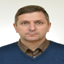

In [106]:
from PIL import Image
file_name = os.path.join(path , 'Oleksiy.Tsebriy.jpg')
image = Image.open(file_name).resize((num_px,num_px))
print('image.size =', image.size)
image

In [107]:
my_image = np.array(image.getdata())
my_image.shape

(4096, 3)

In [108]:
my_image = my_image.reshape((1, num_px*num_px*3))
print('my_image.shape =', my_image.shape)
my_image


my_image.shape = (1, 12288)


array([[227, 227, 217, ...,  43,  65,  96]])

In [109]:
my_predicted_image = predict(res["w"], res["b"], my_image)
my_predicted_image
print('y = {} , your algorithm predicts a {} picture.'.
      format(np.squeeze(my_predicted_image),classes[np.squeeze(my_predicted_image)]))

y = 0 , your algorithm predicts a non-cat picture.


<ipython-input-89-0b1aa165eb81>:12: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))


image.size = (64, 64)


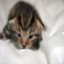

In [110]:
file_name = os.path.join(path , 'test_cat.jpg')
image = Image.open(file_name).resize((num_px,num_px))
print('image.size =', image.size)
image

In [111]:
my_image = np.array(image.getdata())[:,:3] # by unknown reason picture made as screenshot has 4 channels 
print('my_image.shape =', my_image.shape)
my_image = my_image.reshape((1, num_px*num_px*3))
print('after reshape: my_image.shape =', my_image.shape)
my_predicted_image = predict(res["w"], res["b"], my_image)
    
print('y = {} , your algorithm predicts a {} picture.'.
      format(np.squeeze(my_predicted_image),classes[np.squeeze(my_predicted_image)]))

my_image.shape = (4096, 3)
after reshape: my_image.shape = (1, 12288)
y = 1 , your algorithm predicts a cat picture.


# Sklearn implementation


In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
y_train = np.squeeze(Y_train) # LogisticRegression requires 1d input for y
clf = LogisticRegression(C=0.01).fit(X_train_scaled, y_train)

In [114]:
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
y_test = np.squeeze(Y_test)
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 90.909%
test accuracy= 66.000%


In [115]:
print('y = {}, sklearn algorithm predicts a {} picture.'.
      format(np.squeeze(clf.predict(my_image)), classes[np.squeeze(clf.predict(my_image))]))

y = 1, sklearn algorithm predicts a cat picture.


# Sklearn for brest cancer dataset

In [116]:
# load and split data
X_cancer, y_cancer = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=0)

In [117]:
# normalization data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
clf = LogisticRegression(max_iter=10000).fit(X_train_scaled, y_train)
print('\nBreast cancer dataset')
print(f'X_cancer.shape = {X_cancer.shape}')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))


Breast cancer dataset
X_cancer.shape = (569, 30)
Accuracy of Logistic regression classifier on training set: 0.99
Accuracy of Logistic regression classifier on test set: 0.96


# Sklearn for synthetic dataset

# Additional functions for visualization

In [119]:
def plot_decision_boundary(clf, X_train, y_train, X_test=None, y_test=None, title=None, precision=0.01, plot_symbol_size=50, ax=None, is_extended=True):

    '''    
    Draws the binary decision boundary for X that is nor required additional features and 
    transformation (like polynomial)
    '''
    # Create color maps - required by pcolormesh
    from matplotlib.colors import  ListedColormap
    colors_for_points = np.array(['grey', 'orange']) # neg/pos
    colors_for_areas = np.array(['grey', 'orange']) # neg/pos  # alpha is applied later 
    cmap_light = ListedColormap(colors_for_areas)
    

 
    
    mesh_step_size = precision #.01  # step size in the mesh
    if X_test is None or y_test is None:
        show_test= False
        X= X_train
    else:
        show_test= True
        X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Create grids of pairs
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    # Flatten all samples 
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])

    print ('Call prediction for all grid values (precision of drawing = {},\n you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    # Reshape the result to original meshgrid shape 
    Z = Z.reshape(xx1.shape)
    
    if ax:
        plt.sca(ax)
    
    # Plot all meshgrid prediction      
    plt.pcolormesh(xx1, xx2, Z, cmap=cmap_light, alpha=0.2, shading='auto')

    # Plot train set
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, 
                c=colors_for_points[y_train.ravel()], edgecolor = 'black',alpha=0.6)
    # Plot test set
    if show_test:
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size, 
                c=colors_for_points[y_test.ravel()],edgecolor = 'black',alpha=0.6)
    if  is_extended:
        # Create legend  
        import matplotlib.patches as mpatches # use to assign lavels for colored points 
        patch0 = mpatches.Patch(color=colors_for_points[0], label='negative')
        patch1 = mpatches.Patch(color=colors_for_points[1], label='positive')
        plt.legend(handles=[patch0, patch1])
    plt.title(title)
    if is_extended:
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
    else:
        plt.tick_params(
        top =False,
        bottom= False,
        left  = False,
        labelleft = False, 
        labelbottom = False
        )

   
    
def plot_data_logistic_regression(X,y,legend_loc= 1, title= None):
    '''
    :param X: 2 dimensional ndarray
    :param y:  1 dimensional ndarray. Use y.ravel() if necessary
    :return:
    '''

    positive_indices = (y == 1)
    negative_indices = (y == 0)
#     import matplotlib as mpl
    colors_for_points = ['grey', 'orange'] # neg/pos

    plt.scatter(X[negative_indices][:,0], X[negative_indices][:,1], s=40, c=colors_for_points [0], edgecolor = 'black', label='negative', alpha = 0.7)
    plt.scatter(X[positive_indices][:,0], X[positive_indices][:,1], s=40, c=colors_for_points [1], edgecolor = 'black',label='positive', alpha = 0.7)
    plt.title(title)
    plt.legend(loc= legend_loc)

# Make classification


In [120]:
Xc_2, yc_2 = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    random_state=2018,
    n_clusters_per_class=1,
    flip_y=0.1,
    class_sep=0.8
)

In [121]:
plt.figure()    
plot_data_logistic_regression(Xc_2, yc_2, title='make_classification')

In [122]:
C = 1000
X_train, X_test, y_train, y_test = train_test_split(Xc_2, yc_2, random_state = 0)
clf = LogisticRegression(C=C).fit(X_train, y_train)
print('Make Regression')
print(f'Xc_2.shape = {Xc_2.shape}')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Make Regression
Xc_2.shape = (100, 2)
Accuracy of Logistic regression classifier on training set: 0.99
Accuracy of Logistic regression classifier on test set: 0.92


In [123]:
plt.figure()    
plot_decision_boundary(
    clf,
    X_train,
    y_train,
    X_test,
    y_test,
    title=f'C={C}',
    precision=0.01,
    plot_symbol_size=50
)

Call prediction for all grid values (precision of drawing = 0.01,
 you may configure to speed up e.g. precision=0.05)


In [124]:
_, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
axes = (ax1, ax2, ax3, ax4, ax5, ax6)
C = (0.001, 0.01, 0.1, 1, 100, 1000)
for i in range (len(C)):    
    clf = LogisticRegression(C=C[i]).fit(X_train, y_train)
    print('Accuracy = {:.2f}'.format(clf.score(X_train, y_train)))
    plot_decision_boundary(
        clf,
        X_train,
        y_train,
        title=f'C={C[i]}',
        precision=0.01,
        plot_symbol_size=30,
        ax= axes[i],
        is_extended=False
    )

Accuracy = 0.57
Call prediction for all grid values (precision of drawing = 0.01,
 you may configure to speed up e.g. precision=0.05)
Accuracy = 0.97
Call prediction for all grid values (precision of drawing = 0.01,
 you may configure to speed up e.g. precision=0.05)
Accuracy = 0.99
Call prediction for all grid values (precision of drawing = 0.01,
 you may configure to speed up e.g. precision=0.05)
Accuracy = 0.99
Call prediction for all grid values (precision of drawing = 0.01,
 you may configure to speed up e.g. precision=0.05)
Accuracy = 0.99
Call prediction for all grid values (precision of drawing = 0.01,
 you may configure to speed up e.g. precision=0.05)
Accuracy = 0.99
Call prediction for all grid values (precision of drawing = 0.01,
 you may configure to speed up e.g. precision=0.05)


# Polynomial In Logistic Regression

# Additional functions for visualization

In [125]:
def plot_decision_boundary(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.05,plot_symbol_size = 50, ax= None,  is_extended=True):

    '''    
    Draws the binary decision boundary for X that is nor required additional features and transformation (like polynomial)
    '''
    # Create color maps - required by pcolormesh
    from matplotlib.colors import  ListedColormap
    colors_for_points = np.array(['grey', 'orange']) # neg/pos
    colors_for_areas = np.array(['grey', 'orange']) # neg/pos  # alpha is applied later 
    cmap_light = ListedColormap(colors_for_areas)
    

 
    
    mesh_step_size = precision #.01  # step size in the mesh
    if X_test is None or y_test is None:
        show_test= False
        X= X_train
    else:
        show_test= True
        X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Create grids of pairs
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    # Flatten all samples 
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])

    print ('Call prediction for all grid values (precision of drawing = {},\n you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    # Reshape the result to original meshgrid shape 
    Z = Z.reshape(xx1.shape)
    
    if ax:
        plt.sca(ax)
    
    # Plot all meshgrid prediction      
    plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2, shading='auto')

    # Plot train set
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, 
                c=colors_for_points[y_train.ravel()], edgecolor = 'black',alpha=0.6)
    # Plot test set
    if show_test:
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size, 
                c=colors_for_points[y_test.ravel()],edgecolor = 'black',alpha=0.6)
    if  is_extended:
        # Create legend  
        import matplotlib.patches as mpatches # use to assign lavels for colored points 
        patch0 = mpatches.Patch(color=colors_for_points[0], label='negative')
        patch1 = mpatches.Patch(color=colors_for_points[1], label='positive')
        plt.legend(handles=[patch0, patch1])
    plt.title(title)
    if is_extended:
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
    else:
        plt.tick_params(
        top =False,
        bottom= False,
        left  = False,
        labelleft = False, 
        labelbottom = False
        )

def plot_decision_boundary_poly(clf, X_train, y_train, degree, X_test=None, y_test= None, title=None, precision=0.05,plot_symbol_size = 50, ax= None,  is_extended=True):

    '''    
    Draws the binary decision boundary for X that is nor required additional features and transformation (like polynomial)
    '''
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=degree,include_bias=False)
    
    # Create color maps - required by pcolormesh
    from matplotlib.colors import  ListedColormap    
    colors_for_points = np.array(['grey', 'orange']) # neg/pos
    colors_for_areas = np.array(['grey', 'orange']) # neg/pos  # alpha is applied later 
    cmap_light = ListedColormap(colors_for_areas)
    

 
    
    mesh_step_size = precision #.01  # step size in the mesh
    if X_test is None or y_test is None:
        show_test= False
        X= X_train
    else:
        show_test= True
        X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Create grids of pairs
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    # Flatten all samples 
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])
    target_samples_grid_poly = poly.fit_transform(target_samples_grid)
    print ('Call prediction for all grid values (precision of drawing = {},\n you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid_poly)
    print ('Computing prediction completed.')
    # Reshape the result to original meshgrid shape 
    Z = Z.reshape(xx1.shape)
    
    if ax:
        plt.sca(ax)
    
    # Plot all meshgrid prediction      
    plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2, shading='auto')

    # Plot train set
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, 
                c=colors_for_points[y_train.ravel()], edgecolor = 'black',alpha=0.6)
    # Plot test set
    if show_test:
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size, 
                c=colors_for_points[y_test.ravel()],edgecolor = 'black',alpha=0.6)
    if  is_extended:
        # Create legend  
        import matplotlib.patches as mpatches # use to assign lavels for colored points 
        patch0 = mpatches.Patch(color=colors_for_points[0], label='negative')
        patch1 = mpatches.Patch(color=colors_for_points[1], label='positive')
        plt.legend(handles=[patch0, patch1])
    plt.title(title)
    if is_extended:
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
    else:
        plt.tick_params(
        top =False,
        bottom= False,
        left  = False,
        labelleft = False, 
        labelbottom = False
        )

   
        
    
def plot_data_logistic_regression(X,y,legend_loc= None, title= None):
    '''
    :param X: 2 dimensional ndarray
    :param y:  1 dimensional ndarray. Use y.ravel() if necessary
    :return:
    '''

    positive_indices = (y == 1)
    negative_indices = (y == 0)
#     import matplotlib as mpl
    colors_for_points = ['grey', 'orange'] # neg/pos

    plt.scatter(X[negative_indices][:,0], X[negative_indices][:,1], s=40, c=colors_for_points [0], edgecolor = 'black', label='negative', alpha = 0.7)
    plt.scatter(X[positive_indices][:,0], X[positive_indices][:,1], s=40, c=colors_for_points [1], edgecolor = 'black',label='positive', alpha = 0.7)
    plt.title(title)
    plt.legend(loc= legend_loc)

def plot_multi_class_logistic_regression(X,y,dict_names=None, colors= None,  title =None):
    '''
    Draw the multi class samples of 2 features
    :param X: X 2 ndarray (m,2),
    :param y: vector (m,)
    :param dict_names: dict of values of y and names
    :return: None
    '''
    if not colors:
        colors_for_points = ['green','grey', 'orange', 'brown'] 
    else: 
         colors_for_points = colors 
            
    y_unique = list(set(y))

    for i in range (len(y_unique)):
        ind = y == y_unique[i] # vector

        if dict_names:
            plt.scatter(X[ind,0], X[ind,1], c=colors_for_points[i], s=40, label=dict_names[y_unique[i]],edgecolor='black', alpha=.7)
        else:
            plt.scatter(X[ind, 0], X[ind, 1], s=40, c=colors_for_points [i], edgecolor = 'black', alpha = 0.7)
    if title:
        plt.title(title)

    if dict_names:
        plt.legend(frameon=True)

def draw_linear_decision_boundaries_multiclass(clf,X,):
    colors=  ['green','grey', 'orange', 'brown'] 
    x_line = np.linspace(X[:,0].min(),X[:,0].max(), 100)
    for w, b, color in zip(clf.coef_, clf.intercept_, colors):
        # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b,
        # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a
        # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
        y_line = -(x_line  * w[0] + b) / w[1]
        ind = (X[:,0].min()< x_line) & (x_line <X[:,0].max()) & (X[:,1].min()< y_line) & (y_line <X[:,1].max() )
        plt.plot(x_line[ind] , y_line[ind], '-', c=color, alpha=.8)

In [126]:
X_mk8, y_mk8 = make_blobs(n_samples = 200, n_features = 2, centers = 8, # centers impacts for y 
                       cluster_std = 1.3, random_state = 4)
y_train = y_mk8 % 2 # make it binary since make_blobs  with centers = 8 creates y in [0..7]

In [127]:
plt.figure()
plot_data_logistic_regression(X_mk8, y_train)

# Polynomial Features

In [128]:
from sklearn.preprocessing import PolynomialFeatures


In [129]:
degree = 10
poly = PolynomialFeatures(degree=degree, include_bias=False) # default is True means to return the first feature of all 1 as for degree 0
X_train_poly = poly.fit_transform(X_mk8)

In [130]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

In [131]:
C = 0.01
clf = LogisticRegression(C=C).fit(X_train_poly, y_train)
accuracy = clf.score(X_train_poly, y_train)
print("train accuracy = {:.3%}".format(accuracy))

train accuracy = 87.000%


/home/user/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [132]:
plt.figure()
ax = plt.gca()
plot_decision_boundary_poly(
    clf, 
    X_train_poly,
    y_train,
    degree=degree,
    ax=ax,
    precision=0.05,
    title=f'C = {C}, degree = {degree}, accuracy = {accuracy:.3%}'
)

Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)
Computing prediction completed.


# Muticlass classification
</font>
Load fruits data set
</font>

In [133]:
import os
cwd = os.getcwd()
path = os.path.join(cwd,'data') 
fn = os.path.join(path, 'fruit_data_with_colors.txt')
df_fruits = pd.read_table(fn) 
X = df_fruits[['width', 'height']].values
y = df_fruits['fruit_label'].values
df_fruits.head(20)
fruits_dict = dict(zip(df_fruits['fruit_label'].unique(), df_fruits['fruit_name'].unique()))

In [134]:
plt.figure() 
plot_multi_class_logistic_regression (X,y,dict_names=fruits_dict)

In [135]:
fruit_label = 1
y_one_vs_all = y==fruit_label
y_one_vs_all = y_one_vs_all.astype(int)

clf = LogisticRegression(C=1000).fit (X, y_one_vs_all)
print(f'Accuracy={clf.score(X,y_one_vs_all)}')
plt.figure()
plot_decision_boundary(
    clf,
    X,
    y_one_vs_all,
    title=fruits_dict[fruit_label],
    precision=0.01
)

Accuracy=0.7288135593220338
Call prediction for all grid values (precision of drawing = 0.01,
 you may configure to speed up e.g. precision=0.05)


# Sklearn multiclass classificcation

In [136]:
print(f'set(y) = {set(y)}')
print(f'X.shape = {X.shape}\ny.shape = {y.shape}, ')
clf = LogisticRegression(C=1000, max_iter=2000).fit(X, y)
print(f'Accuracy = {clf.score(X,y)}')
clf.intercept_, clf.coef_

set(y) = {1, 2, 3, 4}
X.shape = (59, 2)
y.shape = (59,), 
Accuracy = 0.847457627118644


(array([-29.78254399,  51.87287078, -41.79431079,  19.703984  ]),
 array([[  8.6207137 ,  -3.50837089],
        [ -1.46741893,  -6.28144704],
        [  6.30896093,   0.33942344],
        [-13.4622557 ,   9.45039448]]))

In [137]:
plt.figure() 
plot_multi_class_logistic_regression (X,y,dict_names=fruits_dict)
draw_linear_decision_boundaries_multiclass(clf,X)

# Iris dataset

In [138]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y, labels = iris.data, iris.target, iris.target_names
print(labels)
clf = LogisticRegression(C=100, max_iter=2000).fit(X, y)
print(f'Accuracy = {clf.score(X,y)}')
clf.intercept_, clf.coef_

['setosa' 'versicolor' 'virginica']
Accuracy = 0.98


(array([ 19.922746  ,   5.24082365, -25.16356966]),
 array([[-0.39140131,  3.41396452, -6.40196335, -3.51108037],
        [ 1.35646197,  0.44426921, -0.51407062, -4.41263261],
        [-0.96506066, -3.85823373,  6.91603397,  7.92371299]]))

In [139]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
dict_names = {i:v for i,v in enumerate(labels)}

X2 = X[:,:2]
clf = LogisticRegression(C=100).fit(X2, y)
print (f'Accuracy = {clf.score(X2,y)}')
print (f'clf.intercept_ = {clf.intercept_}, \nclf.coef_ = \n{clf.coef_}')
plt.figure() 
plot_multi_class_logistic_regression (X2, y, dict_names = dict_names)
draw_linear_decision_boundaries_multiclass(clf,X2)

Accuracy = 0.8333333333333334
clf.intercept_ = [ 25.20698869  -6.10712004 -19.09986865], 
clf.coef_ = 
[[-9.33565746  8.18421204]
 [ 3.72540037 -4.30414546]
 [ 5.61025709 -3.88006658]]
